In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
# funcs stolen from nyu deep learning course
import os
import random

In [35]:
def load_this_res(train_setting, job_idx):
    
    #if train_setting == 2:
    #    print(job_idx)
    
    on_cluster = True
    if on_cluster:
        to_save_folder = '/scratch/gpfs/erussek/RNN_project/train_on_sim_and_human_results_optimal'
    else:
        to_save_folder = '/Users/evanrussek/Dropbox/Griffiths_Lab_Stuff/Code/RNNs/train_on_sim_and_human_results_optimal'
    # save loss curve
    loss_file_name = 'loss_res_train_setting_{}_job_{}.npy'.format(train_setting,job_idx)
    loss_full_file_name = os.path.join(to_save_folder, loss_file_name)

   # print(loss_file_name)
    with open(loss_full_file_name, 'rb') as f:
        sim_loss_res = np.load(f)
        human_loss_res = np.load(f)
        train_num = np.load(f)
        r_sim_by_n_back = np.load(f)
        r_human_by_n_back = np.load(f)
    
    return sim_loss_res,human_loss_res,train_num,r_sim_by_n_back,r_human_by_n_back


def load_all_res(train_setting):
    
    # just load one to get the size
    job_idx=0
    sim_loss_res,human_loss_res,train_num,r_sim_by_n_back,r_human_by_n_back=load_this_res(train_setting, job_idx)

    all_jobs = np.arange(50)
    if train_setting < 2:
        bad_jobs = []
    else:
        bad_jobs = [1,10]
    
    good_jobs = np.delete(all_jobs,bad_jobs);
    

    n_train_examples = len(sim_loss_res)
    n_jobs = len(good_jobs)
    n_nback=19
    
    if train_setting == 2:
        n_nback=1

    all_sim_loss_res = np.zeros((n_jobs,n_train_examples))
    all_human_loss_res = np.zeros((n_jobs,n_train_examples))
    all_train_num = np.zeros((n_jobs,n_train_examples))
    all_r_sim_by_n_back = np.zeros((n_jobs,n_nback))
    all_r_human_by_n_back = np.zeros((n_jobs,n_nback))

    on_cluster = True
    for job_idx in range(len(good_jobs)):
        this_job = good_jobs[job_idx]
        sim_loss_res,human_loss_res,train_num,r_sim_by_n_back,r_human_by_n_back=load_this_res(train_setting, this_job)
        all_sim_loss_res[job_idx, :] = sim_loss_res
        all_human_loss_res[job_idx, :] = human_loss_res
        all_train_num[job_idx, :] = train_num
        all_r_sim_by_n_back[job_idx, :] = r_sim_by_n_back
        all_r_human_by_n_back[job_idx, :] = r_human_by_n_back
        
    return all_sim_loss_res,all_human_loss_res,all_train_num,all_r_sim_by_n_back,all_r_human_by_n_back

Train Setting: 0


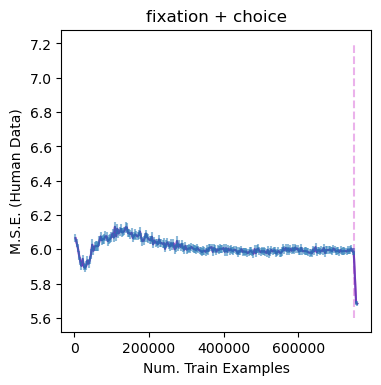

In [38]:
#n_pretrain = np.round(np.linspace(0,1,5)*1.5e6).astype(int);
#these_colors = ['b', 'g', 'r', 'c', 'm']

titles = ['fixation + choice', 'fixation only', 'choice only']

pretrain_vals = [7.5e5, 7.5e5, 0]

for train_setting in range(1):
    print('Train Setting: {}'.format(train_setting))

    fig,ax = plt.subplots(1,figsize=(4,4),dpi=100)
    all_sim_loss_res_fc,all_human_loss_res_fc,all_train_num_fc,all_r_sim_by_n_back_fc,all_r_human_by_n_back_fc=load_all_res(train_setting)


    ax.plot(all_train_num_fc[1,:],np.mean(all_human_loss_res_fc,0), these_colors[pretrain_idx])
    ax.errorbar(all_train_num_fc[1,:],np.mean(all_human_loss_res_fc,0), np.std(all_human_loss_res_fc,0)/np.sqrt(50), alpha=.5)
    ax.vlines(pretrain_vals[train_setting], 5.6,7.2, these_colors[pretrain_idx], linestyles='dashed',alpha=.3)

    ax.set_ylabel('M.S.E. (Human Data)')
    ax.set_xlabel('Num. Train Examples')
    ax.set_title(titles[train_setting])
    
    # did this wrong... 

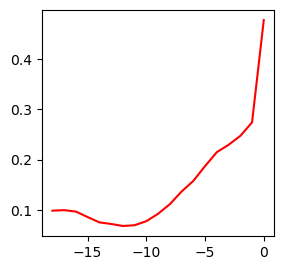

In [39]:
these_tps = np.arange(-18,1,1)

fig,ax = plt.subplots(1,figsize=(3,3),dpi=100)
ax.plot(these_tps,np.flip(np.mean(all_r_human_by_n_back_fc,0)), 'r-', label='fixations + choice')
